In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
def read_data(): # fucntion for reading data
    path = input(str('Enter the Path: '))
    data = pd.read_csv(path)
    return data

In [3]:
train = read_data()

Enter the Path: D:\\Data Science Practice\\Sentiment Analysis\\train_2kmZucJ.csv


In [4]:
test = read_data()

Enter the Path: D:\\Data Science Practice\\Sentiment Analysis\\test_oJQbWVk.csv


In [5]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
def text_feature_extraction(dataframe,word_count=False,char_count=False,avg_word_length=False,NumberOfStopwords=False,NumberOfSpecialCharacters=False,NumberOfUpperCase=False):
    try:        
        if word_count:
            dataframe['WordCount'] = dataframe.tweet.apply(lambda x: len(str(x).split(" ")))
            #return dataframe
        
        if char_count:
            dataframe['CharCount'] = dataframe.tweet.str.len()
            #return dataframe
        
        if avg_word_length:
            def average_word(message):
                words = message.split()
                return (sum(len(word) for word in words)/len(words))

            dataframe['AvgWord'] = dataframe.tweet.apply(lambda x:average_word(x))
            #return dataframe

        if NumberOfStopwords:
            from nltk.corpus import stopwords
            stop = stopwords.words('english')

            dataframe['NumberOfStopword'] = dataframe.tweet.apply(lambda x: len([x for x in x.split() if x in stop]))
            #return dataframe

        if NumberOfSpecialCharacters:
            dataframe['NumberofSpecialCharacter'] = dataframe.tweet.apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
            #return dataframe

        if NumberOfUpperCase:
            dataframe['NumberOfUpperCase'] = dataframe.tweet.apply(lambda x: len([x for x in x.split() if x.isupper()]))
            #return dataframe
        
        return dataframe
    
    except (AttributeError, ValueError, KeyError):
        print('File Not Found, Please Insert right dataframe')
        

In [7]:
text_feature_extraction(train,word_count=True,char_count=True,avg_word_length=True,NumberOfStopwords=True,NumberOfSpecialCharacters=True,NumberOfUpperCase=True)

,id,label,tweet,WordCount,CharCount,AvgWord,NumberOfStopword,NumberofSpecialCharacter,NumberOfUpperCase
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,13,128,8.923077,0,11,0
1,2,0,Finally a transparant silicon case ^^ Thanks t...,17,131,6.764706,3,5,1
2,3,0,We love this! Would you go? #talk #makememorie...,15,123,7.266667,1,8,0
3,4,0,I'm wired I know I'm George I was made that wa...,17,112,5.647059,2,4,2
4,5,1,What amazing service! Apple won't even talk to...,23,124,4.434783,9,0,2
5,6,1,iPhone software update fucked up my phone big ...,11,65,5.000000,2,0,0
6,7,0,Happy for us .. #instapic #instadaily #us #son...,11,100,8.181818,1,6,0
7,8,0,New Type C charger cable #UK http://www.ebay.c...,30,259,7.666667,0,16,4
8,9,0,Bout to go shopping again listening to music #...,14,130,8.357143,3,5,0
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,14,128,8.214286,0,12,0


In [8]:
def text_pre_processing(dataframe,lower_case=False,remove_punctuation=False,remove_link=False,remove_digit=False,remove_stopwords=False,remove_common_word=False,remove_rare_word=False,spelling_correction=False,stemming=False,lemmatisation=False):
    if lower_case:
        dataframe['tweet'] = dataframe['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
            
    if remove_punctuation:
        dataframe['tweet'] = dataframe['tweet'].str.replace('[^\w\s]','')
        
    if remove_link:
        dataframe['tweet'] = dataframe['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
        
    if remove_digit:
        dataframe['tweet'] = dataframe['tweet'].str.replace('\d+','')
            
    if remove_stopwords:
        from nltk.corpus import stopwords
        stop = stopwords.words('english')
            
        dataframe['tweet'] = dataframe['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
            
    if remove_common_word:
        frequency = pd.Series(" ".join(dataframe.tweet).split()).value_counts()[:10]
        frequency = list(frequency.index)
        dataframe['tweet'] = dataframe['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))
            
    if remove_rare_word:
        frequency = pd.Series(" ".join(dataframe.tweet).split()).value_counts()[-10:]
        frequency = list(frequency.index)
        dataframe['tweet'] = dataframe['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in frequency))
            
    if spelling_correction:
        from textblob import TextBlob
        dataframe['tweet'] = dataframe['tweet'].apply(lambda x: str(TextBlob(x).correct()))
        
    if stemming:
        from nltk.stem import PorterStemmer
        st = PorterStemmer()
            
        dataframe['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
            
    if lemmatisation:
        #from nltk.stem.wordnet import WordNetLemmatizer
        #dataframe['tweet'] = dataframe['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
        lemmatiser = WordNetLemmatizer()
        dataframe['tweet'].apply(lambda x: " ".join([lemmatiser.lemmatize(word) for word in x.split()]))
           
    return dataframe
            

In [9]:
text_pre_processing(train,lower_case=True,remove_punctuation=True,remove_link=True,remove_digit=True,remove_stopwords=True,remove_common_word=True,remove_rare_word=True,spelling_correction=False,stemming=True,lemmatisation=True)

,id,label,tweet,WordCount,CharCount,AvgWord,NumberOfStopword,NumberofSpecialCharacter,NumberOfUpperCase
0,1,0,fingerprint pregnancy test android apps beauti...,13,128,8.923077,0,11,0
1,2,0,finally transparant silicon case thanks uncle ...,17,131,6.764706,3,5,1
2,3,0,would go talk makememories unplug relax smartp...,15,123,7.266667,1,8,0
3,4,0,im wired know im george made way cute daventry...,17,112,5.647059,2,4,2
4,5,1,amazing service wont even talk question unless...,23,124,4.434783,9,0,2
5,6,1,software update fucked big time stupid iphones,11,65,5.000000,2,0,0
6,7,0,happy us instapic instadaily us xperia xperiaz,11,100,8.181818,1,6,0
7,8,0,type c charger cable uk bay amazon etsy year r...,30,259,7.666667,0,16,4
8,9,0,bout go shopping listening music justme music ...,14,130,8.357143,3,5,0
9,10,0,photo fun selfie pool water camera picoftheday...,14,128,8.214286,0,12,0


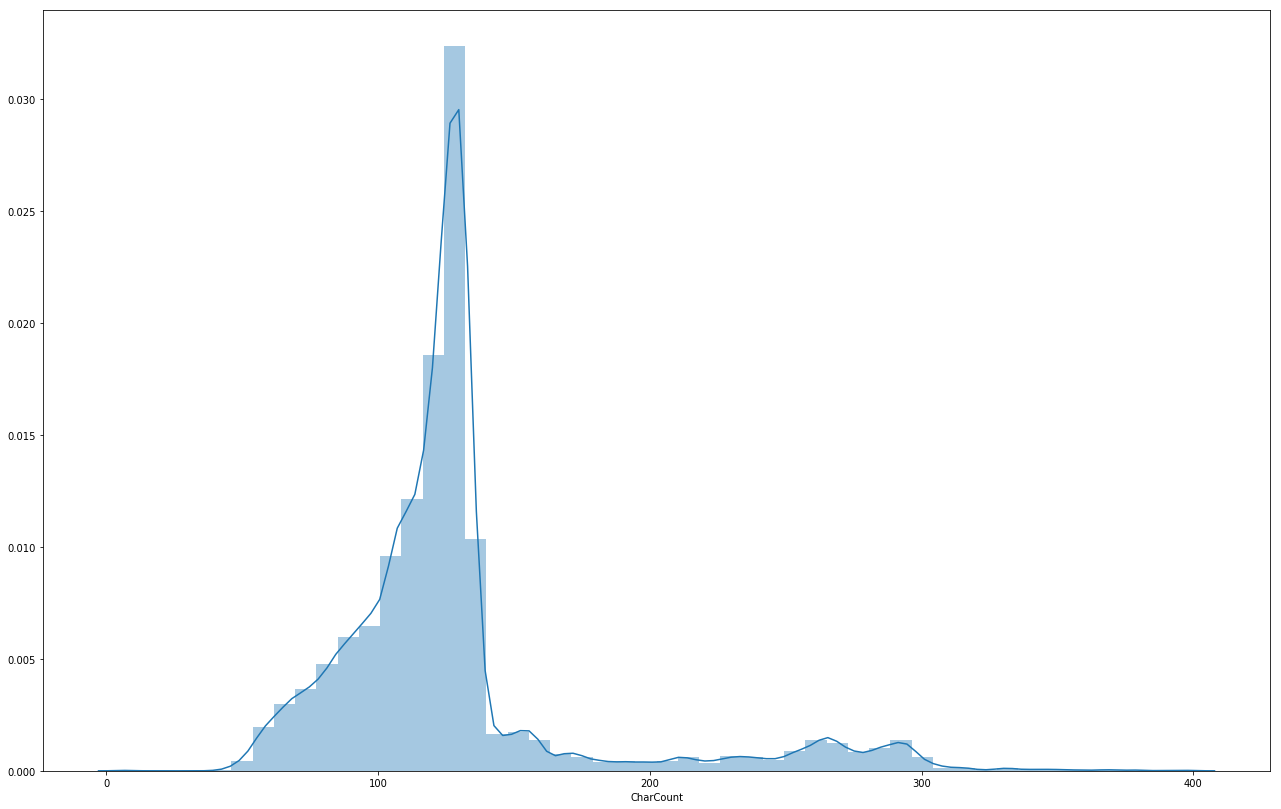

In [10]:
plt.figure(figsize=(22,14))
sns.distplot(train.CharCount,bins=50)

# The visuals shows that tweet length is concentrated around 100 to 150

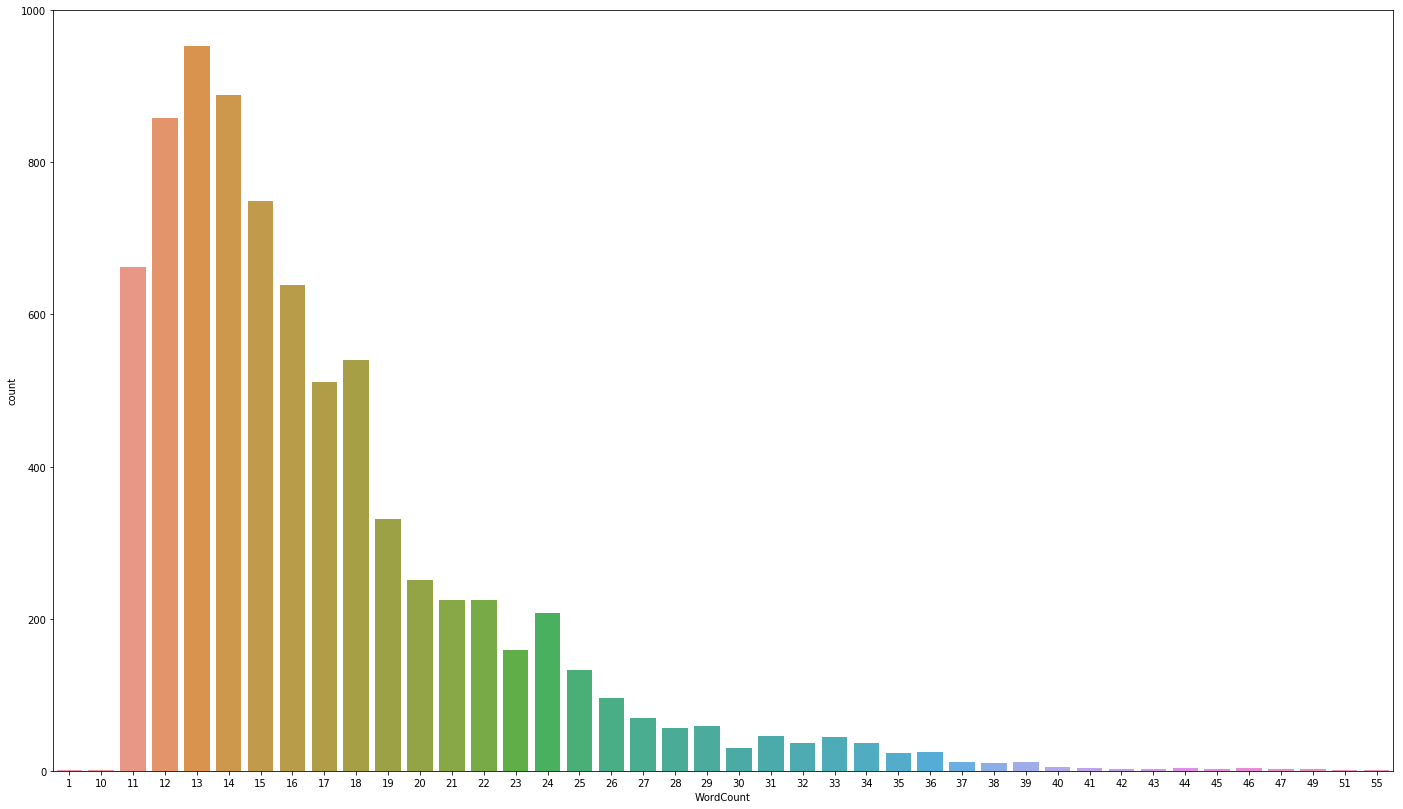

In [11]:
plt.figure(figsize=(24,14))
sns.countplot(train.WordCount)

# 75% of the tweets have 10 to 25 words.

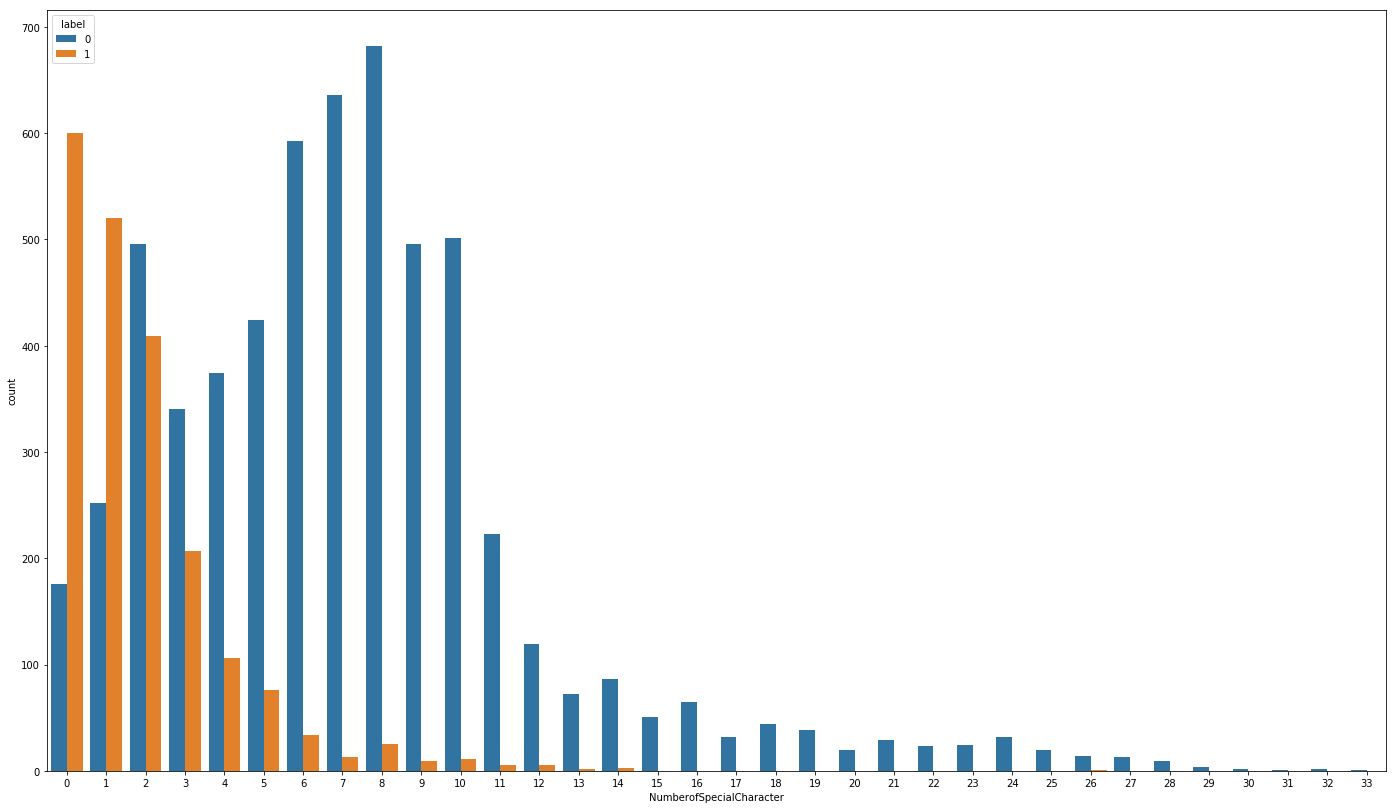

In [12]:
plt.figure(figsize=(24,14))
sns.countplot(train.NumberofSpecialCharacter,hue=train.label)

# This shows that negative sentiment consist of less number of Special Characters.

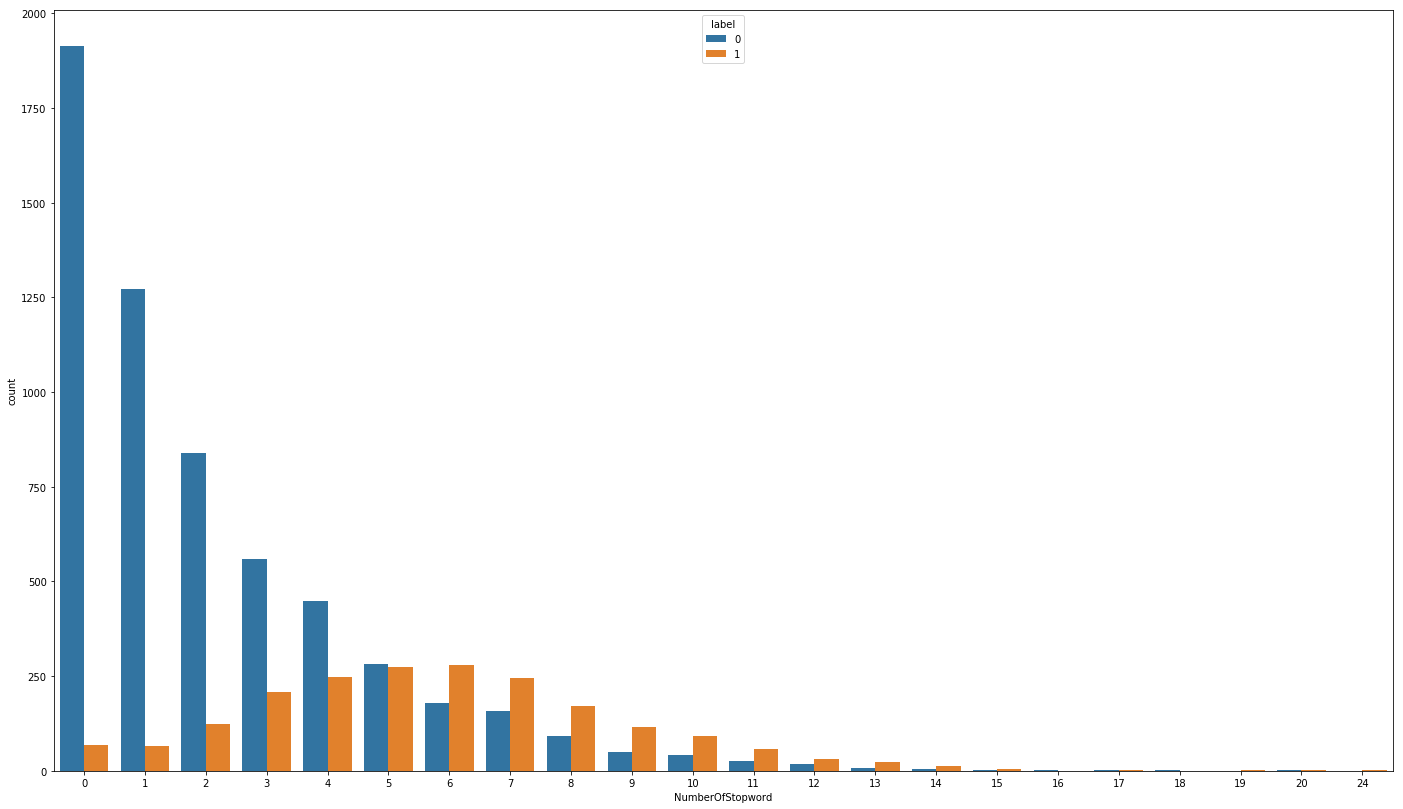

In [13]:
plt.figure(figsize=(24,14))
sns.countplot(train.NumberOfStopword,hue=train.label)

#More Numbers of Stop words means more likely to be negative sentiment.

### Since the target variable was label,so that analysis is limited to label.

In [14]:
text_pre_processing(test,lower_case=True,remove_punctuation=True,remove_link=True,remove_digit=True,remove_stopwords=True,remove_common_word=True,remove_rare_word=True,spelling_correction=False,stemming=True,lemmatisation=True)

,id,tweet
0,7921,hate upgrade wont let download apps ugh sucks
1,7922,currently shitting fucking pants imac cashmone...
2,7923,id puts cdroms possible yes wouldnt block screen
3,7924,ipod officially dead lost pictures videos sos ...
4,7925,fighting itunes night want music paid
5,7926,repost getbakednfried repostapp announce bourbon
6,7927,software update really things bad things
7,7928,baby iphones gold appleisbest gb gegönnt aaaaah
8,7929,im confusedwhy take time set appointment still...
9,7930,fruit tastes better pick healthy fruit nyc pic...


In [15]:
def Text_TrainingModel(train,test):
    x_train = train['tweet']
    y_train = train['tweet']
    x_test = test['tweet']
    
    vector = CountVectorizer()
    
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    return x_train, y_train, x_test

In [16]:
x ,y , x1 = Text_TrainingModel(train,test)

In [17]:
def NaiveBayesModel(x_train,y_train,x_test,test):
    naivebayes = MultinomialNB()
    naivebayes.fit(x_train,y_train)
    NB_prediction = naivebayes.predict(x_test)
    resultNB = pd.DataFrame({'id':test['id'],'label':NB_prediction})
    resultNB.to_csv("SubmissionNB.csv",index=False)    

In [18]:
def LogisticRegressionModel(x_train,y_train,x_test,test):
    logreg = LogisticRegression()
    logreg.fit(x_train,y_train)
    LR_prediction = logreg.predict(x_test)
    resultLR = pd.DataFrame({'id':test['id'],'label':LR_prediction})
    resultLR.to_csv("SubmissionLR.csv",index=False)
    

In [19]:
def RandomForestModel(x_train,y_train,x_test,test):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(x_train,y_train)
    RF_prediction = rf.predict(x_test)
    resultRF = pd.DataFrame({'id':test['id'],'label':RF_prediction})
    resultRF.to_csv("SubmissionRF.csv",index=False)

In [20]:
NaiveBayesModel(x,y,x1,test)

In [21]:
LogisticRegressionModel(x,y,x1,test)

KeyboardInterrupt: 

In [142]:
RandomForestModel(x,y,x1,test)

In [28]:
def tfidf_trainingModel(train,test):
    x_train = train['tweet']
    y_train = train['tweet']
    x_test = test['tweet']
    
    tfidf_vector = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words='english',ngram_range=(1,1))
    
    x_train = tfidf_vector.fit_transform(x_train)
    x_test = tfidf_vector.transform(x_test)
    
    return x_train, y_train, x_test

In [29]:
x_vect, y, x_vec = tfidf_trainingModel(train,test)

In [30]:
NaiveBayesModel(x_vect,y,x_vec,test)

In [27]:
LogisticRegressionModel(x_vect,y,x_vec,test)

KeyboardInterrupt: 

In [ ]:
RandomForestModel(x_vect,y,x_vec,test)